# Lab 4: Building a Spotify Song Classifier with KNNs and Decision Trees
**Classify by genres**. In this lab, you will build machine learning genre classifiers using a dataset of Spotify tracks. Your goal is to train a model that can distinguish between two selected genres based on various audio features such as danceability, energy, valence, tempo, and more.

We'll follow the familiar workflow of data exploration -> preprocessing -> model training -> evaluation

In [51]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

### Step 1: The data
We'll focus on two genres: Blues and Jazz (what’s the difference, anyway??).

Both genres have rich musical histories, but they differ in structure:

- Blues tends to have simpler chord progressions and a strong emotional expression.
- Jazz often involves complex improvisation and more varied rhythms.

But can a machine really tell them apart just by looking at numerical audio features? That’s what we’ll find out!

In this step, you will:
- Load the dataset
- Extract only blues and jazz for classification

In [52]:
spotify_data = pd.read_csv("data/spotify_dat.csv")

# Print the data types in spotify_data
spotify_data.head(3)

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date,genres
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0261,0.000011,0.356,0.503,117.906,210133,4.0,1999,1999-11-02,rap metal
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.0129,0.000071,0.155,0.489,103.680,206200,4.0,1999,1999-11-02,rap metal
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.0234,0.000002,0.122,0.370,149.749,298893,4.0,1999,1999-11-02,rap metal


In [53]:

# Filter down to two genres
blues_data = spotify_data[spotify_data['genres'] == 'blues']
jazz_data = spotify_data[spotify_data['genres'] == 'jazz']

# Combine both genres into one dataset
combined_data =  pd.concat([blues_data, jazz_data])
combined_data.head(3)

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date,genres
333,4MdlxZHzUi8fGvuXOtNVhb,Johnny B. Goode - Live,Johnny Winter: A Rock N' Roll Collection,6yn5Mylr8HsH9PVro7Fo22,['Johnny Winter'],['2ODUxmFxJSyvGiimNhMHbO'],1,1,False,0.415,...,0.023,0.077100,0.9410,0.924,159.366,203407,4.0,1973,1973,blues
334,576DmaRTiVhm3l00mpQwDm,Good Morning Little School Girl - Live,Johnny Winter: A Rock N' Roll Collection,6yn5Mylr8HsH9PVro7Fo22,['Johnny Winter'],['2ODUxmFxJSyvGiimNhMHbO'],2,1,False,0.294,...,0.188,0.422000,0.9740,0.639,187.886,276968,4.0,1973,1973,blues
335,3k3Q8IZ5oOqCUfOP2UPgpW,I'll Drown in My Tears,Johnny Winter: A Rock N' Roll Collection,6yn5Mylr8HsH9PVro7Fo22,['Johnny Winter'],['2ODUxmFxJSyvGiimNhMHbO'],3,1,False,0.424,...,0.827,0.000021,0.0742,0.390,95.799,285360,3.0,1973,1973,blues


In [54]:

# Rename 'genres' column to 'genre' for clarity
combined_data = combined_data.rename(columns= {'genres':'genre'})

combined_data.head(3)


,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date,genre
333,4MdlxZHzUi8fGvuXOtNVhb,Johnny B. Goode - Live,Johnny Winter: A Rock N' Roll Collection,6yn5Mylr8HsH9PVro7Fo22,['Johnny Winter'],['2ODUxmFxJSyvGiimNhMHbO'],1,1,False,0.415,...,0.023,0.077100,0.9410,0.924,159.366,203407,4.0,1973,1973,blues
334,576DmaRTiVhm3l00mpQwDm,Good Morning Little School Girl - Live,Johnny Winter: A Rock N' Roll Collection,6yn5Mylr8HsH9PVro7Fo22,['Johnny Winter'],['2ODUxmFxJSyvGiimNhMHbO'],2,1,False,0.294,...,0.188,0.422000,0.9740,0.639,187.886,276968,4.0,1973,1973,blues
335,3k3Q8IZ5oOqCUfOP2UPgpW,I'll Drown in My Tears,Johnny Winter: A Rock N' Roll Collection,6yn5Mylr8HsH9PVro7Fo22,['Johnny Winter'],['2ODUxmFxJSyvGiimNhMHbO'],3,1,False,0.424,...,0.827,0.000021,0.0742,0.390,95.799,285360,3.0,1973,1973,blues


## Step 2: Data Exploration
Now that we have Blues and Jazz as our two genres, it's time to explore the data and look for patterns in the audio features.

Let's investigate:
- Which features are available?
- How strongly these features correlate with each other.
- How different genres distribute across  sample features: danceability 

In this step, we will:
- Filter out non-numeric columns before the plotting
- Visualize feature correlations using a heatmap.
- Examine key feature distributions with histograms to see if genres behave differently.


Text(0.5, 1.0, 'Danceability of blues and jazz music')

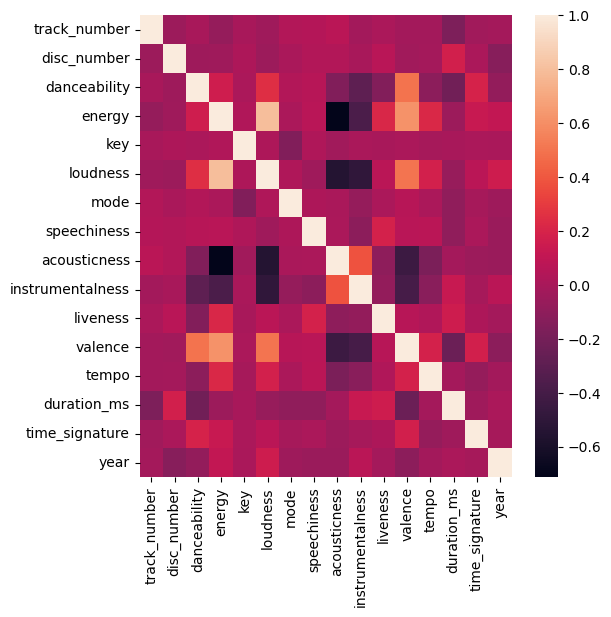

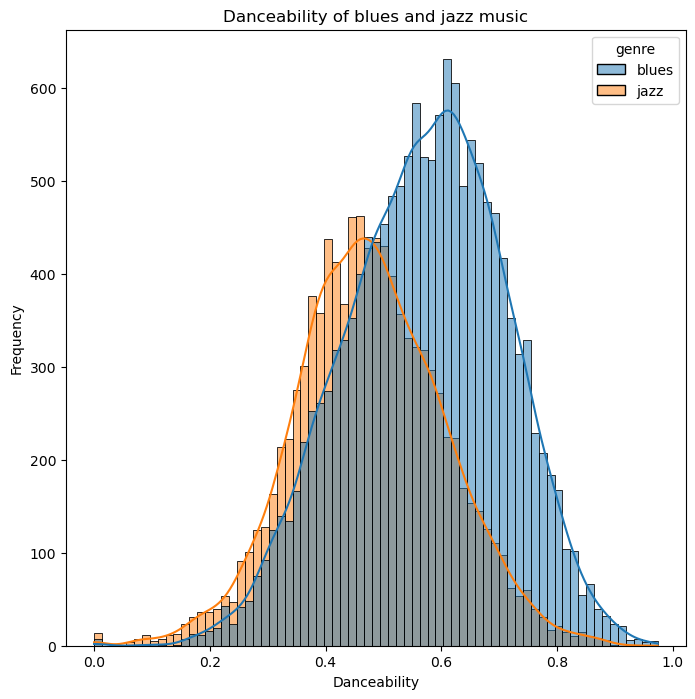

In [55]:
# Exclude non-numeric columns but keep 'genre' for grouping
# id, name, album, album_id, artists, artists_id, explicit
numeric_features = combined_data.select_dtypes(include = 'number')

numeric_features['genre'] = combined_data['genre']

numeric_features.head(3)

#Correlation heatmap

plt.figure(figsize = (6,6))
sns.heatmap(numeric_features.drop('genre', axis=1).corr())

#Histogram of danceability

plt.figure(figsize= (8,8))
sns.histplot(numeric_features, x = 'danceability', hue = 'genre', kde = True)
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.title('Danceability of blues and jazz music')




### Step 3: Check for class imbalance
An unequal distribution between the target classes can cause issues for our classifiers, so we'll need to check for that. A commonly used guideline for class imbalance is:

- Slight Imbalance (Less than 1.5:1) → Generally okay; no need for balancing.
- Moderate Imbalance (Between 1.5:1 and 3:1) → Might cause some bias; balancing can help.
- Severe Imbalance (More than 3:1) → Strongly affects model performance; balancing is usually necessary.

In [56]:
# Print counts of each genre
class_counts =  combined_data['genre'].value_counts()

# Calculate ratio of majority to minority class
class_ratio = combined_data[combined_data['genre'] == 'blues'].shape[0] / combined_data[combined_data['genre'] == 'jazz'].shape[0]

# Print class distribution and ratio
print(f" Class distribution: {class_counts}")

print(f"Class ratio: {class_ratio}")

 Class distribution: genre
blues    14811
jazz     10023
Name: count, dtype: int64
Class ratio: 1.4777012870398085


Given this result, should we be worried about the imbalance?

We have a class ratio of 1.48. From the guideline above, we have a slight class imbalance and don't need to worry about it as it is generally okay. 

### Step 4: Preprocessing
We need to ensure all the variables we use are numerical so the models can process them. First we'll drop all the variables that are not numeric or the target. Then we'll use a sklearn utility, `LabelEncoder()` to encode our categorical target variable into numerical values. Print the first five values of your encoded labels.

In [57]:
# Define the features (drop columns that are not numeric or target)
X = numeric_features.drop('genre', axis = 1)

# Set the target variable as 'genre'
y =  combined_data['genre']

# Encode the target variable ('label') using label encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Print first five values of encoded labels
y_encoded[:5]

array([0, 0, 0, 0, 0])

Good, now we'll do our data splitting and scaling.  Let's go with an 80/20 split this time.

In [58]:
# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.2, random_state= 42)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform only the training set
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform the test set
X_test_scaled = scaler.fit_transform(X_test)



### Step 5: Train the models
OK, now it's time to build our models and assess the training accuracy. We'll use the default of k = 5 for the KNN model.

In [59]:
# Initialize models
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

# Train (fit) both models
knn_model = knn.fit(X_train_scaled, y_train)
dt_model = dt.fit(X_train_scaled, y_train)

# Predictions on training data
knn_y_train_pred = knn_model.predict(X_train_scaled)
dt_y_train_pred = dt_model.predict(X_train_scaled)

# Compute training accuracy
knn_train_accuracy = accuracy_score(y_train, knn_y_train_pred)
dt_train_accuracy = accuracy_score(y_train, dt_y_train_pred)

#Print training accuracy for both models

print(f"KNN Training Accuracy: {knn_train_accuracy:.3f}")
print(f"Decision Tree Training Accuracy: {dt_train_accuracy:.3f}")

KNN Training Accuracy: 0.921
Decision Tree Training Accuracy: 1.000


### Step 6: Evaluate models
OK, now let's go ahead and predict on the test data to see how well our models do at predicting the genre of unseen tracks.

In [60]:
# Make predictions
knn_pred = knn_model.predict(X_test_scaled)
dt_pred = dt_model.predict(X_test_scaled)

# Evaluate prediction accuracy
knn_accuracy = accuracy_score(y_test, knn_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)

#Print prediction accuracy for both models
print(f"KNN Test Prediction Accuracy: {knn_accuracy:.3f}")
print(f"Decision Tree Test Prediction Accuracy: {dt_accuracy:.3f}")

KNN Test Prediction Accuracy: 0.892
Decision Tree Test Prediction Accuracy: 0.846


### Step 7: Visualizing Model Performance
Now that we have evaluated our models on unseen data, let’s compare their performance by visualizing the training vs. test accuracy.  We'll look for signs of overfitting by plotting the training accuracy and test accuracy for both k-NN and Decision Trees.

Create a bar chart that compares the training accuracy and test accuracy for k-NN and Decision Trees. Your plot should clearly display:

- The training and test accuracy for both models.
- Properly labeled axes and a title.
- A legend to differentiate training and test accuracy.
- Accuracy values displayed on top of each bar.

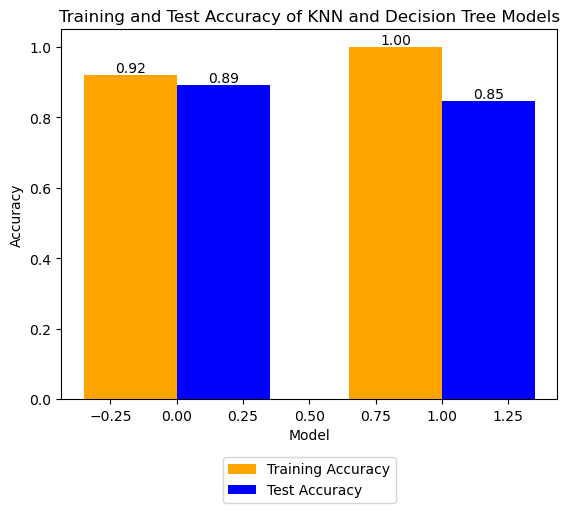

In [70]:
width = 0.35
x = np.arange(2)


fig, ax = plt.subplots()
# Plot barchart of training and test accuracy for KNN and DT Models

bars1 = ax.bar(x - width/2, [knn_train_accuracy, dt_train_accuracy], width, label = 'Training Accuracy', color = 'orange')
bars2 = ax.bar(x + width/2, [knn_accuracy, dt_accuracy], width, label = 'Test Accuracy', color = 'blue')

# Display values on top of bars
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}', ha = 'center', va = 'bottom')
for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}', ha = 'center', va = 'bottom')
    

plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Training and Test Accuracy of KNN and Decision Tree Models')
ax.legend(loc = 'lower center', bbox_to_anchor = (0.5, -0.3))

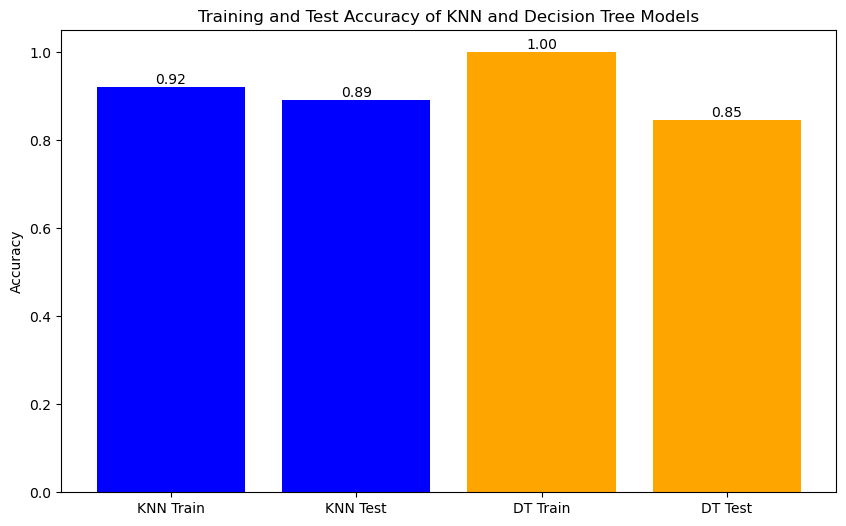

In [75]:
plt.figure(figsize = (10,6))

bars = plt.bar(['KNN Train', 'KNN Test', 'DT Train', 'DT Test'], 
               [knn_train_accuracy, knn_accuracy, dt_train_accuracy, dt_accuracy],
               color = ['blue', 'blue', 'orange', 'orange'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}', ha = 'center', va = 'bottom')

plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy of KNN and Decision Tree Models')

# plt.legend(['Training Accuracy', 'Test Accuracy'],
#            loc = 'lower center',
#            bbox_to_anchor = (0.5, -0.3))

plt.show()





Which model does a better job of generalizing to unseen data? How do you know?
Does it appear that either of the models are overfitting? Why?

The KNN model does better at generalizing to our test data. We know this from our accuracy scores. The ratio of accuracy of testing and training data is much higher in the KNN model versus the decision tree model. For the decision tree model, there are signs of overfitting as we have an accuracy score of 1 for the training data. This accuracy drops significantly to 0.85 when the testing data is used. 

### Bonus question
In the workflow above, we used the default parameter values of k = 5 for the KNN model, and maxdepth = None for the Decision Tree. Choose one of the models and see if you can improve test performance by optmizing its corresponding parameter value.